# Model
## iCW773

In [2]:
import numpy as np
from cobra.io import read_sbml_model

In [3]:
model = read_sbml_model('iCW773_test7.xml')

model

No objective coefficients in model. Unclear what should be optimized


Name,iCW773
Memory address,2a158c66160
Number of metabolites,949
Number of reactions,1207
Number of genes,773
Number of groups,0
Objective expression,0
Compartments,


In [71]:
solution = model.optimize()
solution.fluxes

ALAR       1.293856e-24
ALATA_L    1.293823e-24
ASNN       0.000000e+00
ASNS1      0.000000e+00
ASNS2      0.000000e+00
               ...     
KARA2      0.000000e+00
OMCDC      0.000000e+00
THRD_L     0.000000e+00
VALTA      0.000000e+00
LEUTAi     0.000000e+00
Name: fluxes, Length: 1207, dtype: float64

In [72]:
model.summary()

Non-linear or non-reaction model objective. Falling back to minimal display.


Metabolite,Reaction,Flux,C-Number,C-Flux
glc_D_e,EX_glc_e,4.187,6,100.00%
nh4_e,EX_nh4_e,0.5371,0,0.00%
o2_e,EX_o2_e,3.195,0,0.00%
so4_e,EX_so4_e,0.9735,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
26dap_M_e,EX_26dap_M_e,-0.008519,7,0.24%
co2_e,EX_co2_e,-5.884,1,23.42%
etoh_e,EX_etoh_e,-1.803,2,14.36%
glyc_e,EX_glyc_e,-0.3486,3,4.16%
h2o_e,EX_h2o_e,-7.958,0,0.00%


In [73]:
for metabolite in model.metabolites.query('Lys', 'name'):
    print(metabolite.name)
    print(metabolite.id)

L_Lysine
lys_L_c
L_Lysine
lys_L_e
L_Lysine-tRNA (Lys)
lystrna_c
tRNA(Lys)
trnalys_c


In [74]:
model.metabolites.get_by_id('lys_L_c')

Metabolite identifier,lys_L_c
Name,L_Lysine
Memory address,0x145c45e50
Formula,C6H15N2O2
Compartment,
In 6 reaction(s),"DAPDC, PROTEIN, LYSabcpp, LYSt3pp, LYSTRS, LYSt2pp"


In [75]:
model.metabolites.lys_L_c.reactions

frozenset({<Reaction DAPDC at 0x13d9c1e10>,
           <Reaction LYSTRS at 0x13daf3150>,
           <Reaction LYSabcpp at 0x13da41850>,
           <Reaction LYSt2pp at 0x13da5e4d0>,
           <Reaction LYSt3pp at 0x13da48450>,
           <Reaction PROTEIN at 0x13db35510>})

In [76]:
for reaction in model.metabolites.lys_L_c.reactions:
    print(reaction.id, reaction, reaction.name)

DAPDC DAPDC: 26dap_M_c + h_c --> co2_c + lys_L_c diaminopimelate decarboxylase
PROTEIN PROTEIN: 1.3527 ala_L_c + 0.38519 arg_L_c + 0.39281 asn_L_c + 0.39281 asp_L_c + 40.0656 atp_c + 0.089437 cys_L_c + 0.69314 gln_L_c + 1.1139 glu_L_c + 0.71651 gly_c + 30.7601 h2o_c + 0.13619 his_L_c + 0.38316 ile_L_c + 0.71347 leu_L_c + 0.37909 lys_L_c + 0.15347 met_L_c + 0.26018 phe_L_c + 0.32319 pro_L_c + 0.498 ser_L_c + 0.5539 thr_L_c + 0.055899 trp_L_c + 0.15753 tyr_L_c + 0.55492 vaL_L_c --> 40.0656 adp_c + 40.0656 h_c + 40.0656 pi_c + protein_c PROTEIN
LYSabcpp LYSabcpp: atp_c + h2o_c + lys_L_e --> adp_c + h_c + lys_L_c + pi_c L_lysine transport via ABC system
LYSt3pp LYSt3pp: h_e + lys_L_c --> h_c + lys_L_e L_lysine transport out via proton antiport
LYSTRS LYSTRS: atp_c + lys_L_c + trnalys_c --> amp_c + lystrna_c + ppi_c LysyL_tRNA synthetase
LYSt2pp LYSt2pp: h_e + lys_L_e <=> h_c + lys_L_c L_lysine transport in via proton symport


In [77]:
model.reactions.DAPDC

Reaction identifier,DAPDC
Name,diaminopimelate decarboxylase
Memory address,0x13d9c1e10
Stoichiometry,"26dap_M_c + h_c --> co2_c + lys_L_c meso-2,6_Diaminoheptanedioate + H+ --> CO2 + L_Lysine"
GPR,cg1334 and cg2343
Lower bound,0.0365565828071713
Upper bound,1.49946356856463


### Changing the objective function
Determine the maximum possible production rate of lysine

In [78]:
with model:
    model.objective = model.reactions.EX_lys_L_e
    print(model.optimize().objective_value)

1.49946356856463


The maximum prosible production rate of lysine with iCW773 is 1,499

### Model Fluxes Check

In [79]:
model.optimize()

,fluxes,reduced_costs
ALAR,1.293856e-24,-0.0
ALATA_L,1.293823e-24,0.0
ASNN,0.000000e+00,0.0
ASNS1,0.000000e+00,0.0
ASNS2,0.000000e+00,0.0
...,...,...
KARA2,0.000000e+00,0.0
OMCDC,0.000000e+00,0.0
THRD_L,0.000000e+00,0.0
VALTA,0.000000e+00,0.0


In [80]:
solution = model.optimize()

In [81]:
solution.fluxes

ALAR       1.293856e-24
ALATA_L    1.293823e-24
ASNN       0.000000e+00
ASNS1      0.000000e+00
ASNS2      0.000000e+00
               ...     
KARA2      0.000000e+00
OMCDC      0.000000e+00
THRD_L     0.000000e+00
VALTA      0.000000e+00
LEUTAi     0.000000e+00
Name: fluxes, Length: 1207, dtype: float64

In [82]:
type(solution.fluxes)

pandas.core.series.Series

In [83]:
solution.fluxes.describe()

count    1207.000000
mean        0.111671
std         0.950128
min       -11.007620
25%         0.000000
50%         0.000000
75%         0.000000
max        11.007620
Name: fluxes, dtype: float64

#### Histogram of the distribution of flux values:

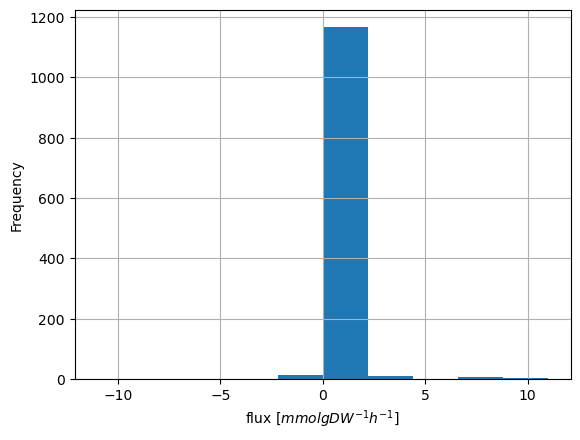

In [84]:
fig = solution.fluxes.hist()
fig.set_xlabel('flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency');

In [85]:
solution.fluxes[solution.fluxes != 0.]

ALAR       1.293856e-24
ALATA_L    1.293823e-24
ASPTA     -1.604673e+00
VPAMT     -3.321601e-29
CBMKr      1.580921e-25
               ...     
PSCVT      9.067333e-02
SHK3Dr     9.067333e-02
SHKK       9.067333e-02
TRPS3      9.067333e-02
DHAD1      4.649546e-25
Name: fluxes, Length: 201, dtype: float64

The model is checked for fluxes

## iCGB21FR

In [4]:
model2 = read_sbml_model('iCGB21FR.xml')

model2

SBML package 'layout' not supported by cobrapy, information is not parsed
https://juser.fz-juelich.de/record/188973 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


Name,iCBG21FR
Memory address,2a1625cebe0
Number of metabolites,1042
Number of reactions,1539
Number of genes,805
Number of groups,102
Objective expression,1.0*Growth - 1.0*Growth_reverse_699ae
Compartments,"cytosol, periplasm, extracellular space"


In [35]:
solution = model2.optimize()
solution.fluxes

12DGR120tipp     0.0
12DGR140tipp     0.0
12DGR161tipp     0.0
12DGR180tipp     0.0
12DGR181tipp     0.0
                ... 
EX_pyr_e         0.0
L_LACtex         0.0
CYTB1           20.0
EX_34dhbz_e      0.0
3_4DHBZt2        0.0
Name: fluxes, Length: 1539, dtype: float64

In [36]:
model2.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.03095,0,0.00%
cl_e,EX_cl_e,0.03499,0,0.00%
cu2_e,EX_cu2_e,0.01952,0,0.00%
fe2_e,EX_fe2_e,0.02221,0,0.00%
fe3_e,EX_fe3_e,0.02221,0,0.00%
glc__D_e,EX_glc__D_e,10,6,100.00%
h_e,EX_h_e,10,0,0.00%
k_e,EX_k_e,0.03173,0,0.00%
mg2_e,EX_mg2_e,0.05104,0,0.00%
mn2_e,EX_mn2_e,0.02258,0,0.00%


In [37]:
for metabolite in model2.metabolites.query('Lys', 'name'):
    print(metabolite.name)
    print(metabolite.id)

L-Lysine
lys__L_c
L-Lysine
lys__L_e
L-Lysine
lys__L_p


In [38]:
model2.metabolites.get_by_id('lys__L_c')

Metabolite identifier,lys__L_c
Name,L-Lysine
Memory address,0x1447d82d0
Formula,C6H15N2O2
Compartment,c
In 5 reaction(s),"DAPDC, Growth, LYSabcpp, LYSt3pp, LYSabc"


In [39]:
model2.metabolites.lys__L_c.reactions

frozenset({<Reaction DAPDC at 0x145df8bd0>,
           <Reaction Growth at 0x14683edd0>,
           <Reaction LYSabc at 0x1461d9bd0>,
           <Reaction LYSabcpp at 0x1461ceb90>,
           <Reaction LYSt3pp at 0x14613d4d0>})

In [40]:
for reaction in model2.metabolites.lys__L_c.reactions:
    print(reaction.id, reaction, reaction.name)

DAPDC DAPDC: 26dap__M_c + h_c --> co2_c + lys__L_c Diaminopimelate decarboxylase
Growth Growth: 0.000215957436615497 10fthf_c + 0.497466186805283 ala__L_c + 0.000215957436615497 amet_c + 0.0062974490405647 amp_c + 0.286450592337987 arg__L_c + 0.233442241629366 asn__L_c + 0.233442241629366 asp__L_c + 52.4155146188655 atp_c + 0.0542420540814976 ca2_c + 0.0613181689413663 cl_c + 0.00284729052433628 coa_c + 0.129291683621802 ctp_c + 0.0342100689811831 cu2_c + 0.0886878118620952 cys__L_c + 0.0114582929862282 datp_c + 0.0144799266879183 dctp_c + 0.0127140840198214 dgtp_c + 0.0117989352923303 dttp_c + 0.000215957436615497 fad_c + 0.0389276218726522 fe2_c + 0.0389276218726522 fe3_c + 0.254849143586252 gln__L_c + 0.0148774528144029 glu__L_c + 0.593290278265672 gly_c + 0.208303052853126 gtp_c + 47.0666420920129 h2o_c + 2.15678814560218 h_c + 0.0917460790586501 his__L_c + 0.281353803150062 ile__L_c + 0.0556012165101363 k_c + 0.436302779712182 leu__L_c + 0.332323631867312 lys__L_c + 0.148832442169

In [41]:
model2.reactions.DAPDC

Reaction identifier,DAPDC
Name,Diaminopimelate decarboxylase
Memory address,0x145df8bd0
Stoichiometry,"26dap__M_c + h_c --> co2_c + lys__L_c Meso-2,6-Diaminoheptanedioate + H+ --> CO2 + L-Lysine"
GPR,lcl_NC_006958_1_prot_WP_011014180_1_1145 or lcl_NC_006958_1_prot_WP_011265883_1_2027
Lower bound,0.0
Upper bound,1000.0


### Changing the objective function
Determine the maximum possible production rate of lysine

In [42]:
with model:
    model2.objective = model2.reactions.EX_lys__L_e
    print(model2.optimize().objective_value)

0.0


The maximum prosible production rate of lysine with iCGB21FR is 0,0

### Model Fluxes Check

In [43]:
model2.optimize()

,fluxes,reduced_costs
12DGR120tipp,0.0,0.0
12DGR140tipp,0.0,0.0
12DGR161tipp,0.0,0.0
12DGR180tipp,0.0,0.0
12DGR181tipp,0.0,0.0
...,...,...
EX_pyr_e,0.0,0.0
L_LACtex,0.0,0.0
CYTB1,0.0,0.0
EX_34dhbz_e,0.0,0.0


In [44]:
solution2 = model2.optimize()

In [45]:
solution2.fluxes

12DGR120tipp    0.0
12DGR140tipp    0.0
12DGR161tipp    0.0
12DGR180tipp    0.0
12DGR181tipp    0.0
               ... 
EX_pyr_e        0.0
L_LACtex        0.0
CYTB1           0.0
EX_34dhbz_e     0.0
3_4DHBZt2       0.0
Name: fluxes, Length: 1539, dtype: float64

In [46]:
type(solution2.fluxes)

pandas.core.series.Series

In [47]:
solution2.fluxes.describe()

count    1539.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: fluxes, dtype: float64

#### Histogram of the distribution of flux values:

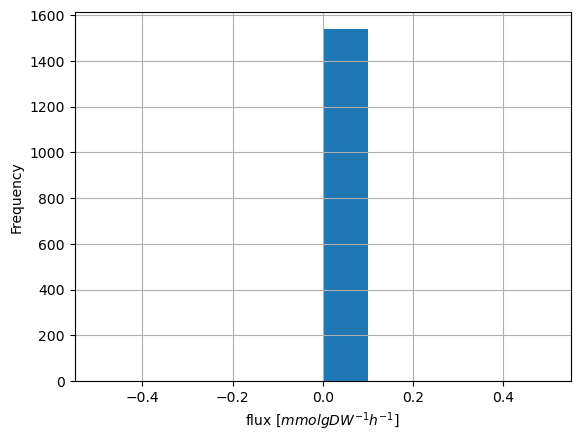

In [48]:
fig = solution2.fluxes.hist()
fig.set_xlabel('flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency');

In [49]:
solution.fluxes[solution.fluxes != 0.]

ACGK            0.163466
ACHBS           0.160557
ACKr            0.085056
ACLS            0.484461
ACONT           5.330763
                 ...    
Ca2t2           0.030954
PRFGS_1         0.242579
FRD7            0.123459
GLYCLTt2rpp    -1.423596
CYTB1          20.000000
Name: fluxes, Length: 300, dtype: float64

The model is checked for fluxes